In [37]:
!pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
from scipy.stats import zscore
import klib
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# The Iris flower dataset consists of three species: setosa, versicolor, and virginica.

#  These species can be distinguished based on thei measurements

# . Now, imagine that you have the measuremen of Iris flowers categorized by their respective species. 

# Your objectiftive is to train a machine learning model that can learn  these measurements and accurately classify the Iris flowers into  their respective species.ecies.

In [2]:
# import data
dataset = pd.read_csv("IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# display columns
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# display data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# display descriptive statistics of numeric data columns
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# display descriptive statistics of all data columns
dataset.describe(include = "all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# display type columns
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# number of null values ​​per column
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

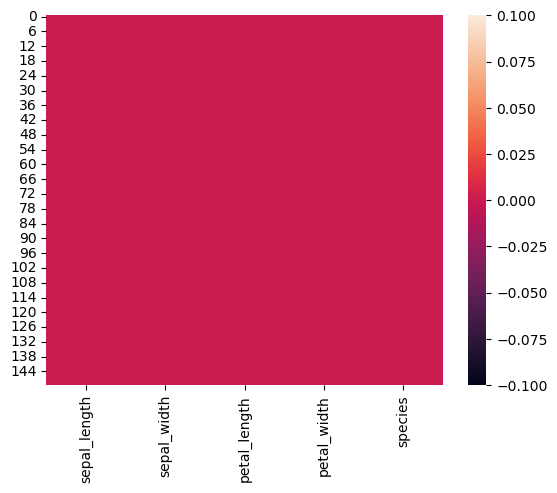

In [9]:
# schema consult the number of null values ​​per column
sns.heatmap(dataset.isnull())

In [10]:
# duplicate columns
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [11]:
dataset.duplicated().sum()

3

In [12]:
dataset.drop_duplicates(inplace= True)

In [13]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 147, dtype: bool

In [14]:
dataset.duplicated().sum()

0

<Axes: >

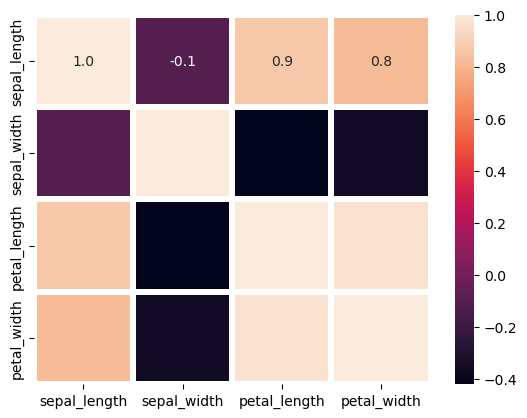

In [15]:
# graphical representation of data where individual values
num_cols = dataset.select_dtypes(include='number').columns

corr_matrix = dataset[num_cols].corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [16]:
#Handle outliers
numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

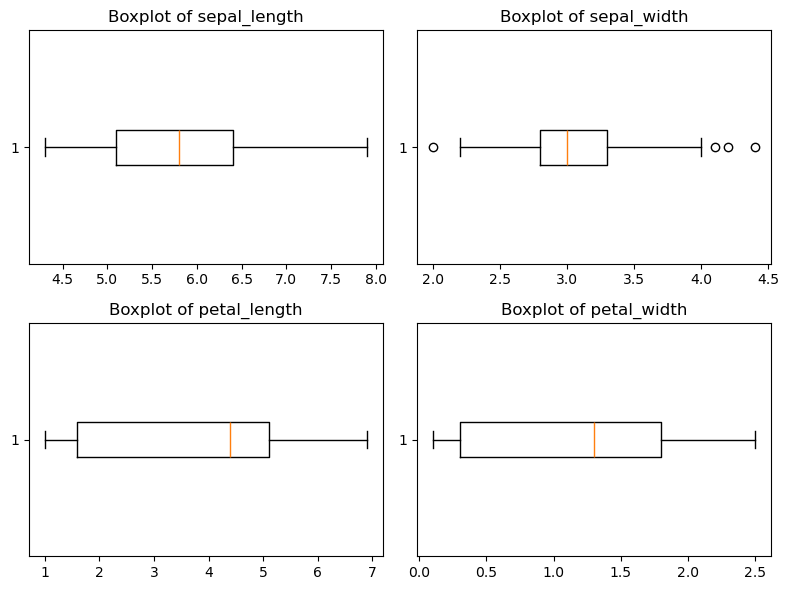

In [17]:
#Boxplots
plt.figure(figsize=(8, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [42]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.108785,0.871305,0.817058,0.782904
sepal_width,-0.108785,1.000000,-0.406069,-0.344369,-0.404652
petal_length,0.871305,-0.406069,1.000000,0.961883,0.948339
petal_width,0.817058,-0.344369,0.961883,1.000000,0.955693
species,0.782904,-0.404652,0.948339,0.955693,1.000000


In [18]:
dataset['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

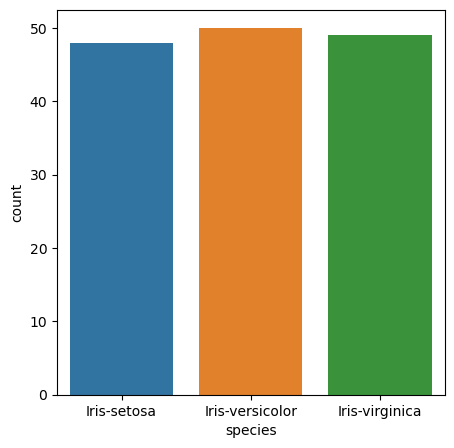

In [19]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x='species',data=dataset)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

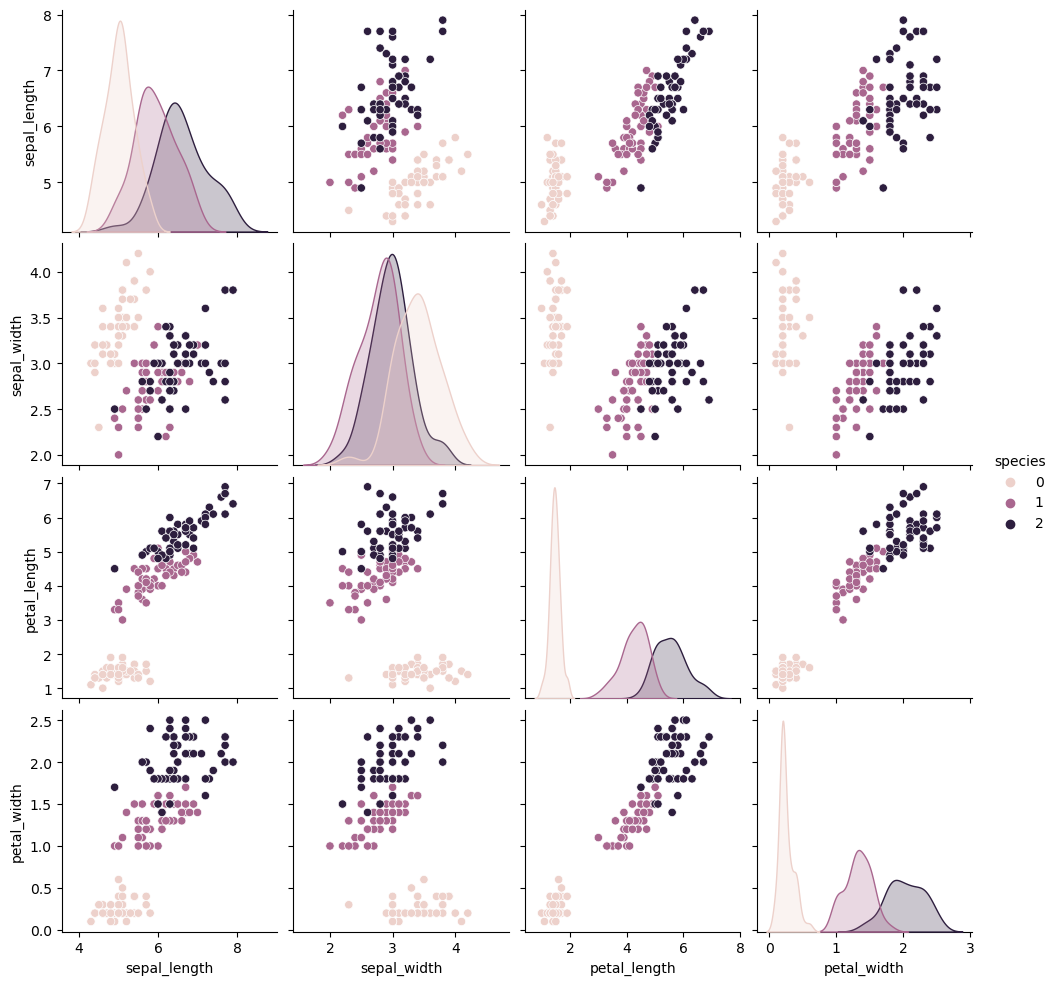

In [36]:
# Assuming 'dataset' is your DataFrame  
# Replace infinite values with NaN  
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)  

# You can also drop any rows with NaN values if desired  
# dataset.dropna(inplace=True)  

# Now, create the pairplot  
sns.pairplot(dataset, hue='species')  
plt.show() 

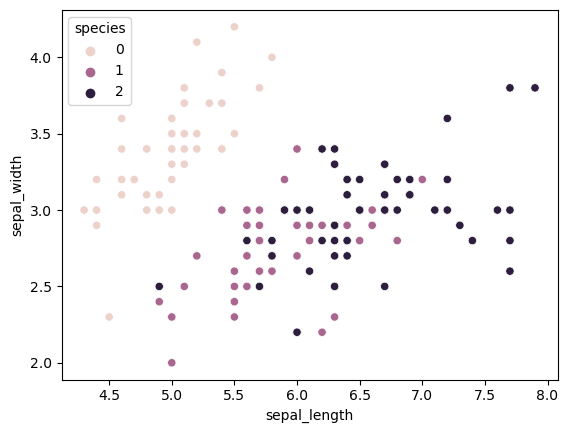

In [39]:
sns.scatterplot(data=dataset, x="sepal_length", y="sepal_width",hue="species")
plt.show()

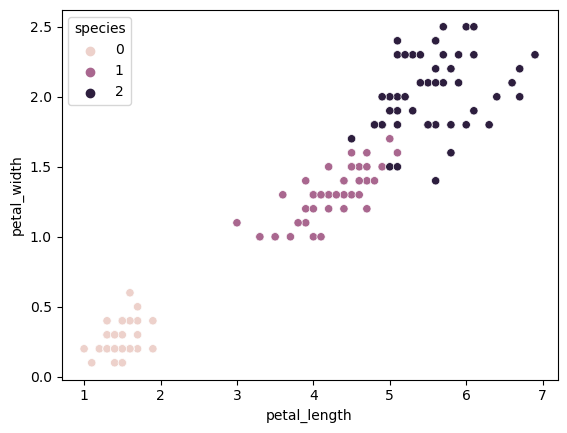

In [41]:
sns.scatterplot(data=dataset, x="petal_length", y="petal_width",hue="species")
plt.show()

In [21]:
# Encode the species labels  
label_encoder = LabelEncoder()  
dataset['species'] = label_encoder.fit_transform(dataset['species']) 

In [22]:
# Separate the features and the target variable
X = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]

In [23]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [25]:
# Split the dataset (80% training and 20% testing)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [26]:
# Create and train the Support Vector Classifier  
model = SVC(kernel='linear', random_state=42)  # You can try 'rbf', 'poly', etc. for different kernels  
model.fit(X_train, y_train) 

SVC(kernel='linear', random_state=42)

In [27]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test) 

In [28]:
# Confusion Matrix  
print(confusion_matrix(y_test, y_pred))  

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [29]:
# Classification Report  
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



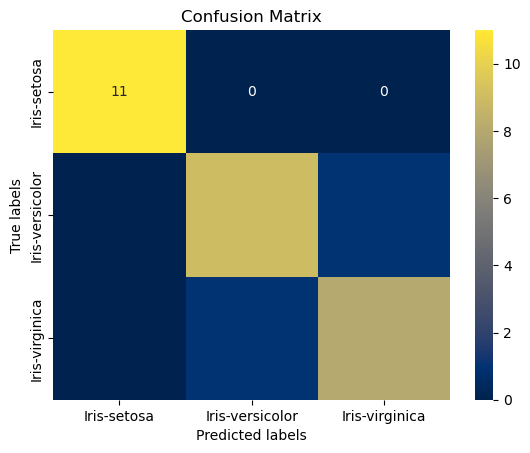

In [46]:
dataset["species"]=dataset["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="cividis",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

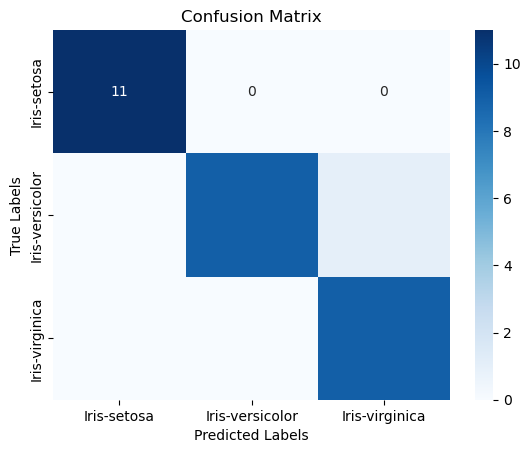

In [30]:
# Visualizing the Confusion Matrix  
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',  
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')  
plt.title('Confusion Matrix')  
plt.show() 

# Use the Iris dataset to develop a model that can classify iris 
 flowers into different species based on their sepal and peta 
 measurements</br> . This dataset is widely used for introducto y
 classification tasks.

In [31]:
# Create and train the Random Forest Classifier  
model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions  
y_pred = model.predict(X_test) 

In [33]:
# Confusion Matrix  
conf_matrix = confusion_matrix(y_test, y_pred)  
print(conf_matrix) 

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [34]:
# Classification Report  
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



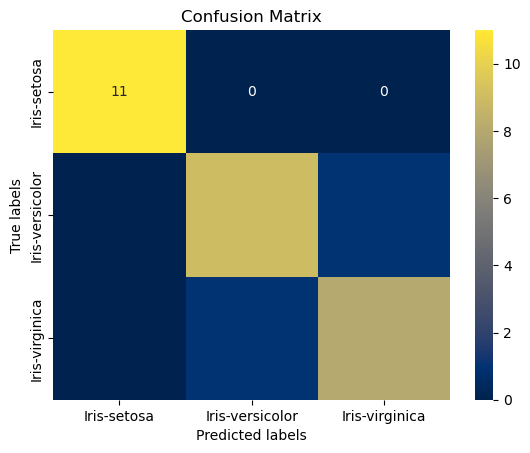

In [47]:
dataset["species"]=dataset["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="cividis",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

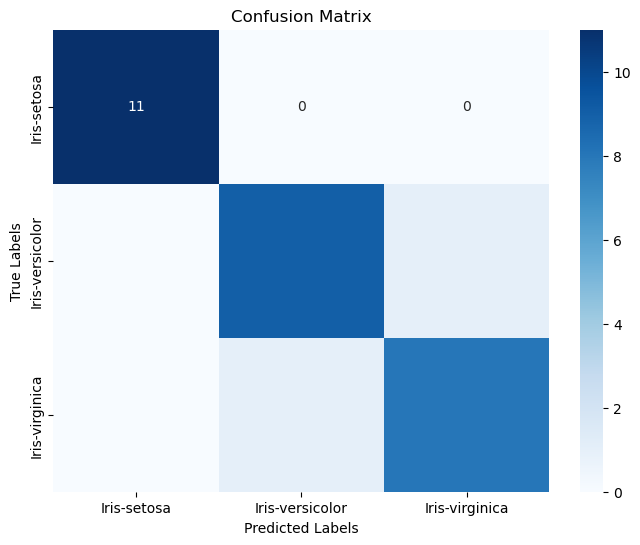

In [35]:
# Visualization  
plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',   
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')  
plt.title('Confusion Matrix')  
plt.show()  